TASK-6:Threshold Tuning and Probability Interpretation

● Predict the probability of the positive class. 
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the 
confusion matrix and F1-score change. 
● Plot the ROC curve and mark optimal threshold. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
print(y_probs[:10])


[8.78417737e-01 3.04735433e-08 1.59969809e-03 9.98775726e-01
 9.99858607e-01 2.00253498e-10 6.15347950e-11 1.92820681e-02
 9.84264981e-01 9.94311003e-01]


In [2]:
def new_threshold(t):
    preds = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"\nThreshold: {t}")
    print(cm)
    print("F1 Score:", f1)
    print(classification_report(y_test, preds))

for t in [0.3, 0.5, 0.7]:
    new_threshold(t)



Threshold: 0.3
[[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.5
[[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Threshold: 0.7
[[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98  

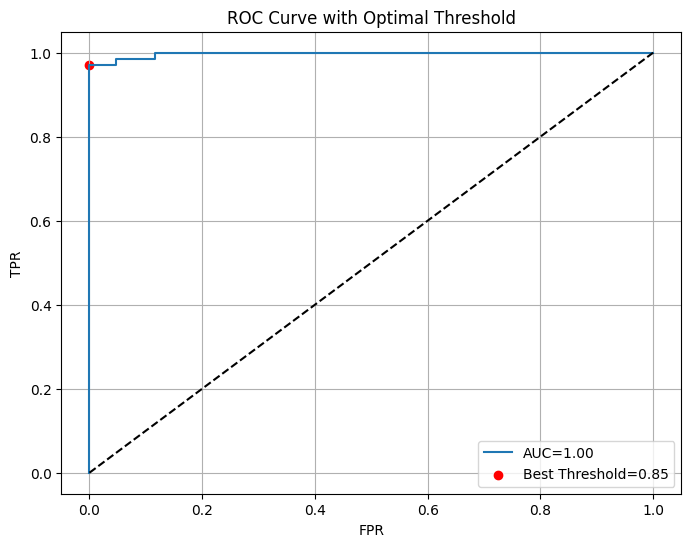

In [3]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
auc=roc_auc_score(y_test,y_probs)
f1_scores=[f1_score(y_test,(y_probs>=t).astype(int)) for t in thresholds]
idx=np.argmax(f1_scores)
best_threshold=thresholds[idx]

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC={auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.scatter(fpr[idx],tpr[idx],c='red',label=f"Best Threshold={best_threshold:.2f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid()
plt.show()
